In [1]:
from flows import NVPFlow, DFlow, ResFlow, BNFlow, phase, Normal
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

X = np.random.normal(size=[10,3])
X[:,0] = (X[:,0] + X[:,1])/2
X[:,2] = (- X[:,0] - X[:,1] + X[:,2])/3
ystd = 0.5
y = 2*X[:,0] + X[:,1] + 0.5*X[:,2] + 3 + np.random.normal(size=10)*ystd

In [3]:
dim = 4
conf = [[NVPFlow(dim, 'nvp{}'.format(i)),
        ResFlow(dim, 'res{}'.format(i))] for i in range(16)]
appr = DFlow(sum(conf, []))

In [4]:
coefs = appr.output[0]

observ_d = Normal(dim=None, sigma=ystd)

eps = y - X[:,0]*coefs[0] - X[:,1]*coefs[1] - X[:,2]*coefs[2]- coefs[3]

logl = observ_d.logdens(eps, full_reduce=False)

In [5]:
logl

<tf.Tensor 'Sum_1:0' shape=(10,) dtype=float32>

In [6]:
prior = Normal(dim=None, sigma=10).logdens(coefs)

In [7]:
prior

<tf.Tensor 'Sum_2:0' shape=() dtype=float32>

In [8]:
gain = tf.reduce_mean(logl) + (prior - appr.logdens)/tf.cast(logl.shape[0], tf.float32)

In [9]:
logl

<tf.Tensor 'Sum_1:0' shape=(10,) dtype=float32>

In [10]:
appr.logdens

<tf.Tensor 'sub_2:0' shape=(1,) dtype=float32>

In [11]:
opt = tf.train.AdamOptimizer(0.0001).minimize(-gain)

In [12]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [13]:
for _ in range(2):
    for _ in range(5000):
        v, _ = sess.run([gain, opt],{phase: True})
    print(v[0])

-2.983489
-2.948054


In [14]:
samples = []
for _ in range(3000):
    samples.append(coefs.eval({phase: False}))
samples = np.array(samples)

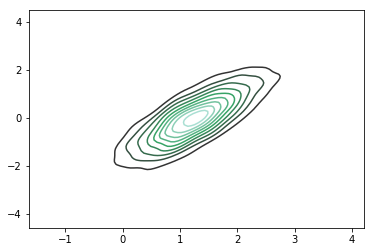

In [15]:
sns.kdeplot(samples[:,0], samples[:,2])
plt.show()